In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
cl = ['Class1.txt','Class2.txt','Class3.txt']
df_train_1 = pd.DataFrame(columns = ["a", "b", "class"])
df_train_2 = pd.DataFrame(columns = ["a", "b", "class"])
df_train_3 = pd.DataFrame(columns = ["a", "b", "class"])
df_test_1 = pd.DataFrame(columns = ["a", "b", "class"])
df_test_2 = pd.DataFrame(columns = ["a", "b", "class"])
df_test_3 = pd.DataFrame(columns = ["a", "b", "class"])

df_train_list = [df_train_1, df_train_2, df_train_3]
df_test_list = [df_test_1, df_test_2, df_test_3]

for i in range(len(cl)):
    dft = pd.read_csv(f'Group20/Classification/LS_Group20/{cl[i]}',names=["a", "b"], sep=" ")
    dft['class']=i+1
    # split the dataset
    testDataPercentage = 30
    training_data, testing_data = train_test_split(dft, test_size=testDataPercentage*0.01, shuffle=False)
    df_train_list[i] = pd.merge(df_train_list[i], training_data, how='outer')
    df_test_list[i] = pd.merge(df_test_list[i], testing_data, how='outer')

for i in range(len(cl)):
    print(df_train_list[i].shape, df_test_list[i].shape)

df_train_12 = pd.merge(df_train_list[0], df_train_list[1], how='outer')
df_train_13 = pd.merge(df_train_list[0], df_train_list[2], how='outer')
df_train_23 = pd.merge(df_train_list[1], df_train_list[2], how='outer')
df_train_binary_list = [df_train_12,df_train_13,df_train_23]
pairCodeList = ['12', '13', '23']

(350, 3) (150, 3)
(350, 3) (150, 3)
(350, 3) (150, 3)


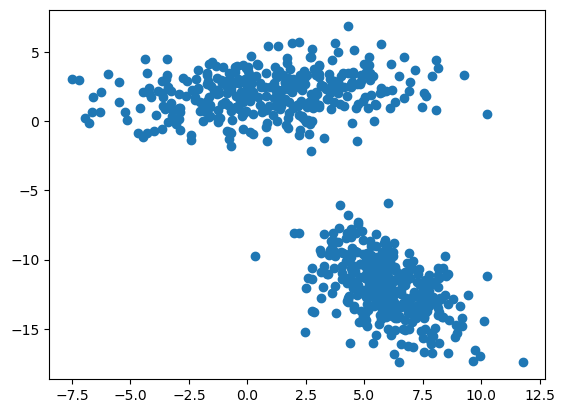

In [3]:
plt.scatter(df_train_12.iloc[:,0], df_train_12.iloc[:,1])
plt.show()

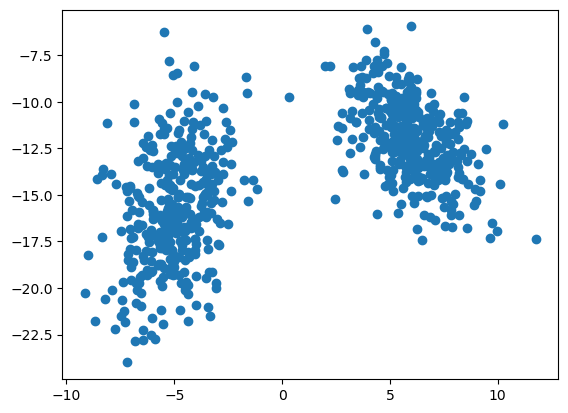

In [4]:
# plt.scatter(df_train_binary_list[0].iloc[:,0], df_train_binary_list[0].iloc[:,1])
# plt.scatter(df_train_binary_list[1].iloc[:,0], df_train_binary_list[1].iloc[:,1])
plt.scatter(df_train_binary_list[2].iloc[:,0], df_train_binary_list[2].iloc[:,1])
plt.show()

In [5]:
def f(an):
    return 1/(1+np.exp(-an))

In [6]:
def E(yn,sn):
    return 0.5*((yn-sn)**2)


In [7]:
def deltaW(yn,sn,an,xnHat,eta):
    return eta*(yn-sn)*f(an)*(1-f(an))*xnHat

In [8]:
w_list = [np.array([0.0]*df_train_list[0].shape[1]),np.array([0.0]*df_train_list[0].shape[1]),np.array([0.0]*df_train_list[0].shape[1])]
w_list

[array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])]

In [9]:
def classCode(yn, pairCode):
    if(pairCode=='12'):
        if(yn==1):
            return 0
        elif(yn==2):
            return 1
    elif(pairCode=='13'):
        if(yn==1):
            return 0
        elif(yn==3):
            return 1
    elif(pairCode=='23'):
        if(yn==2):
            return 0
        elif(yn==3):
            return 1
    print('error')

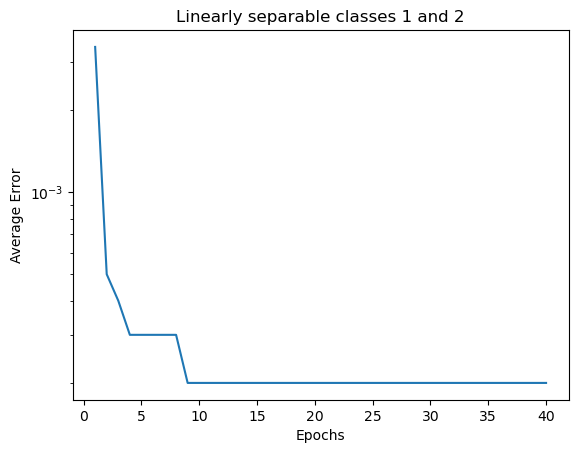

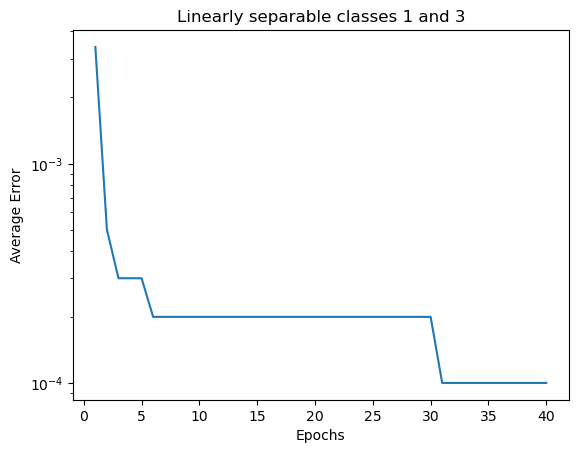

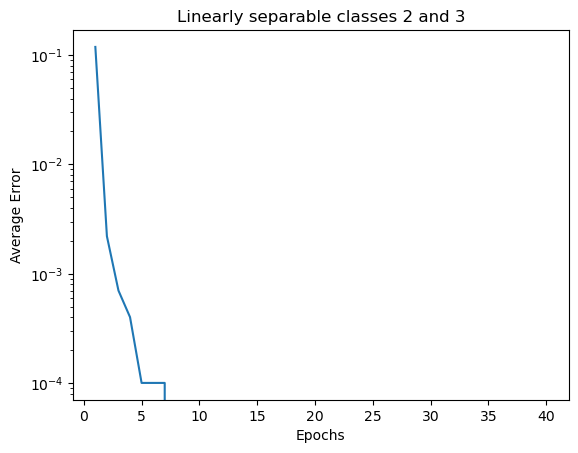

In [10]:
epoch = 40
for ds in range(3):
    averageErrorList = []
    for epochIter in range(epoch):
        eta = 1/(epochIter+1)
        trainingExamplesLength = df_train_binary_list[ds].shape[0]
        instanetaneousErrorList = []
        for i in range(trainingExamplesLength):
            xn = df_train_binary_list[ds].iloc[i,:-1]
            xnHat = np.array([1]+xn.to_list())
            an = np.dot(w_list[ds],xnHat)
            yn = classCode(df_train_binary_list[ds].iloc[i,-1], pairCodeList[ds])
            # print(yn)
            sn = f(an)
            instanetaneousError = E(yn,sn)
            instanetaneousErrorList.append(instanetaneousError)
            deltaWValue = deltaW(yn,sn,an,xnHat,eta)
            w_list[ds] += deltaWValue
        instanetaneousErrorList = np.array(instanetaneousErrorList)
        averageError = np.mean(instanetaneousErrorList)
        averageErrorList.append(float(f'{averageError:.4f}'))

    plt.plot([i+1 for i in range(epoch)],averageErrorList)
    plt.title(f'Linearly separable classes {pairCodeList[ds][0]} and {pairCodeList[ds][1]}')
    plt.xlabel('Epochs')
    plt.ylabel('Average Error')
    plt.yscale("log")
    plt.show()


In [11]:
w_list

[array([-3.51551007,  0.04606467, -0.9096906 ]),
 array([-3.49155817, -0.05657918, -0.81214866]),
 array([-0.0266788 , -2.72633284,  0.06639521])]

In [12]:
df_test_list[ds].shape[0]

150

In [13]:
# pairCodeList = ['12', '13', '23']
def predicted(x,w,pairCode):
    # x = [0.1, 0.2]
    # w = [0, 0, 0]
    # pairCode = '12'
    xnHat = np.array([1]+x.to_list())
    a = np.dot(w,xnHat)
    s = f(a)
    if(pairCode == '12'):
        if(s>0.5):
            return 2
        else:
            return 1
    elif(pairCode == '13'):
        if(s>0.5):
            return 3
        else:
            return 1
    elif(pairCode == '23'):
        if(s>0.5):
            return 3
        else:
            return 2
    print('error')

In [14]:
def maxVoting(x):
    # x = [0.1, 0.2]
    freq = [0,0,0]
    for j in range(3):
        freq[predicted(x, w_list[j], pairCodeList[j])-1]+=1
    y = 0
    maxInd=0
    for i in range(3):
        if(freq[maxInd]<freq[i]):
            maxInd=i
    y = maxInd+1
    return y

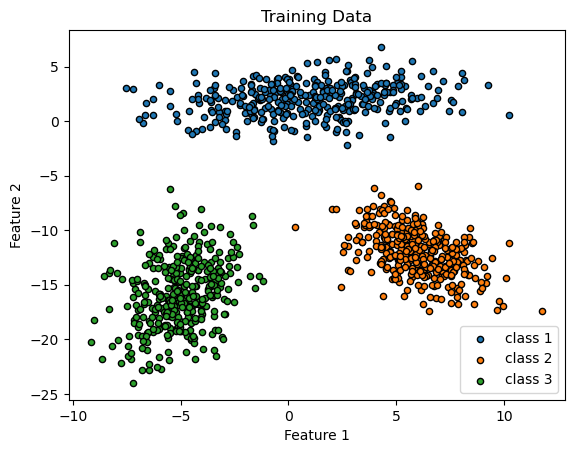

In [15]:
plt.scatter(df_train_list[0].iloc[:, 0], df_train_list[0].iloc[:, 1], s=20, edgecolor='k', label='class 1')
plt.scatter(df_train_list[1].iloc[:, 0], df_train_list[1].iloc[:, 1], s=20, edgecolor='k', label='class 2')
plt.scatter(df_train_list[2].iloc[:, 0], df_train_list[2].iloc[:, 1], s=20, edgecolor='k', label='class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.legend()
plt.show()

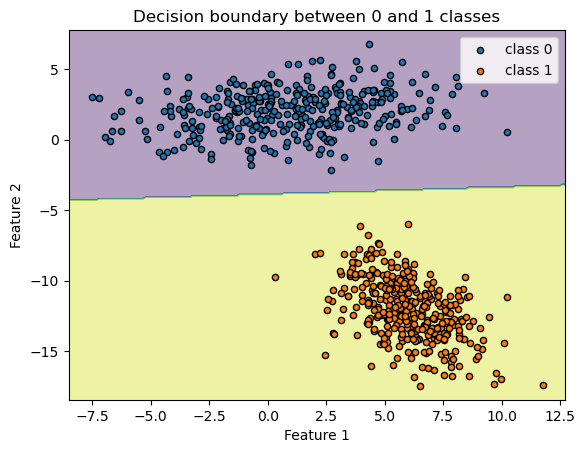

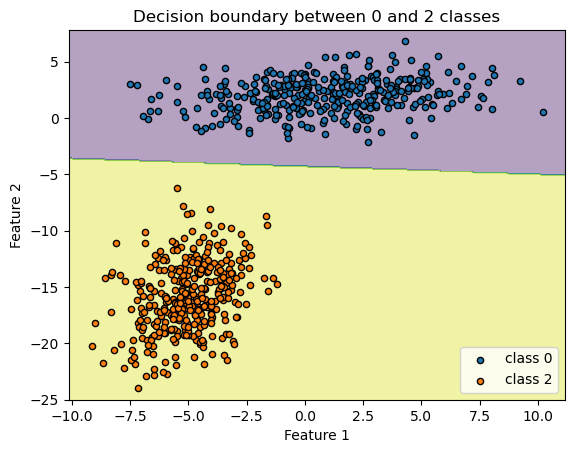

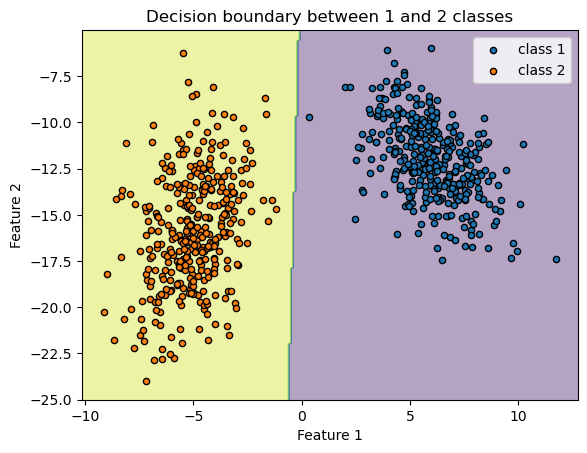

In [16]:
# Define the grid of points to plot the decision boundary
for k in range(len(pairCodeList)):
    x_min = 999
    x_max = -999
    y_min = 999
    y_max = -999

    ar = [int(pairCodeList[k][0])-1, int(pairCodeList[k][1])-1]
    for i in ar:
        x_min = min(x_min, df_train_list[i].iloc[:, 0].min() - 1)
        x_max = max(x_max, df_train_list[i].iloc[:, 0].max() + 1)
        y_min = min(y_min, df_train_list[i].iloc[:, 1].min() - 1)
        y_max = max(y_max, df_train_list[i].iloc[:, 1].max() + 1)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    # Predict the class labels of the grid points
    gridPoints = np.c_[xx.ravel(), yy.ravel()]
    gridPoints = pd.DataFrame(gridPoints, columns=['a', 'b'])
    gridResult = []
    for i in range(len(gridPoints)):
        y = predicted(gridPoints.iloc[i,:], w_list[k],pairCodeList[k])
        gridResult.append(y)

    gridResult = np.array(gridResult)
    gridResult = gridResult.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, gridResult, alpha=0.4)
    for i in ar:
        plt.scatter(df_train_list[i].iloc[:, 0], df_train_list[i].iloc[:, 1], s=20, edgecolor='k', label = f'class {i}')
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision boundary between {ar[0]} and {ar[1]} classes')
    plt.show()

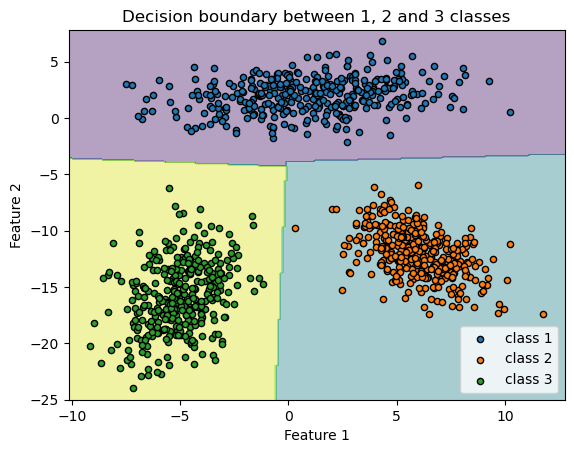

In [17]:
# Define the grid of points to plot the decision boundary
x_min = 999
x_max = -999
y_min = 999
y_max = -999
for i in range(3):
    x_min = min(x_min, df_train_list[i].iloc[:, 0].min() - 1)
    x_max = max(x_max, df_train_list[i].iloc[:, 0].max() + 1)
    y_min = min(y_min, df_train_list[i].iloc[:, 1].min() - 1)
    y_max = max(y_max, df_train_list[i].iloc[:, 1].max() + 1)


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels of the grid points
gridPoints = np.c_[xx.ravel(), yy.ravel()]
gridPoints = pd.DataFrame(gridPoints, columns=['a', 'b'])
gridResult = []
for i in range(len(gridPoints)):
    y = maxVoting(gridPoints.iloc[i,:])
    gridResult.append(y)

gridResult = np.array(gridResult)
gridResult = gridResult.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, gridResult, alpha=0.4)
plt.scatter(df_train_list[0].iloc[:, 0], df_train_list[0].iloc[:, 1], s=20, edgecolor='k', label='class 1')
plt.scatter(df_train_list[1].iloc[:, 0], df_train_list[1].iloc[:, 1], s=20, edgecolor='k', label='class 2')
plt.scatter(df_train_list[2].iloc[:, 0], df_train_list[2].iloc[:, 1], s=20, edgecolor='k', label='class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision boundary between 1, 2 and 3 classes')
plt.legend()
plt.show()

In [18]:
y_pred = []
y_true = []

for ds in range(len(df_test_list)):
    testExampleLength = df_test_list[ds].shape[0]
    for i in range(testExampleLength):
        xn = df_test_list[ds].iloc[i,:-1]
        yn = df_test_list[ds].iloc[i,-1]
        y_true.append(yn)
        y = maxVoting(xn)
        y_pred.append(y)
        
# calculate classification accuracy
accuracy = accuracy_score(y_true, y_pred)

print('Classification accuracy: ', accuracy)
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
# In Binary classification, The count of 
# true negatives is C_{0,0} 
# true positives is C_{1,1}
# false negatives is C_{1,0} 
# false positives is C_{0,1}
print('\nConfusion Matrix')
print(cm)

Classification accuracy:  1.0

Confusion Matrix
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
